<a href="https://colab.research.google.com/github/wonseokb/Genat4_Study/blob/main/PSD_tail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Random Forests

### Can we predict the quartz content of sand, at any point on Earth?

## Decision Trees

Decision trees are intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification. Decision Trees are powerful algorithms, capable of fitting (and overfitting!) complex datasets. Decision Trees are also the fundamental components of Random Forests, which are among the most powerful algorithms available today.

The first part of this notebook is based on the book ["Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow"](https://github.com/ageron/handson-ml3), by Aurélien Géron.

###1. Data

In [29]:
import numpy as np

# Load the csv data into a numpy array

# Sr90 = np.loadtxt("data_array_Bi207_5000.csv", delimiter=",", skiprows=1)
# Cs137 = np.loadtxt("data_array_Cs137_5000.csv", delimiter=",", skiprows=1)
# Bi207 = np.loadtxt("data_array_Sr90_5000.csv", delimiter=",", skiprows=1)
# Sr90 = np.loadtxt("data_array_Bi207_20000.csv", delimiter=",", skiprows=1)
# Cs137 = np.loadtxt("data_array_Cs137_20000.csv", delimiter=",", skiprows=1)
# Bi207 = np.loadtxt("data_array_Sr90_20000.csv", delimiter=",", skiprows=1)
Sr90 = np.loadtxt("data_array_Sr90_22cols_20000.csv", delimiter=",", skiprows=1)
Cs137 = np.loadtxt("data_array_Cs137_22cols_20000.csv", delimiter=",", skiprows=1)
Bi207 = np.loadtxt("data_array_Bi207_22cols_20000.csv", delimiter=",", skiprows=1)


# Print the resulting numpy array
print(Sr90)
print(Sr90.shape)
print(Cs137)
print(Cs137.shape)
print(Bi207)
print(Bi207.shape)

[[-31.4617     -14.43271611   0.28049    ...   0.08406786   0.09878933
    0.08661996]
 [-50.1334     -13.19252127   0.2689     ...   0.08190001   0.08536033
    0.07190683]
 [-29.2227     -13.07923551   0.24755    ...   0.07332859   0.0839915
    0.07923753]
 ...
 [-43.3764     -13.18138667   0.26218    ...   0.08409814   0.08257576
    0.0795812 ]
 [-17.9878     -14.14097165   0.21777    ...   0.0911215    0.07569314
    0.06919784]
 [-36.9793     -13.05263134   0.27458    ...   0.07494133   0.07633316
    0.07972739]]
(20000, 22)
[[-23.1455     -12.80643391   0.24382    ...   0.07268465   0.04977637
    0.07648363]
 [-18.3876     -14.4902425    0.24848    ...   0.08290288   0.06946455
    0.05800734]
 [-22.6657     -13.13101989   0.20828    ...   0.05068272   0.06065574
    0.07758077]
 ...
 [-20.1468     -14.4793889    0.20635    ...   0.06491431   0.0670593
    0.05338008]
 [-31.2219     -12.79177467   0.21857    ...   0.07253467   0.07163476
    0.07365767]
 [-24.265      -14.061

###2. Plots

Minimum value of the array: -161.883
Maximum value of the array: -14.3094


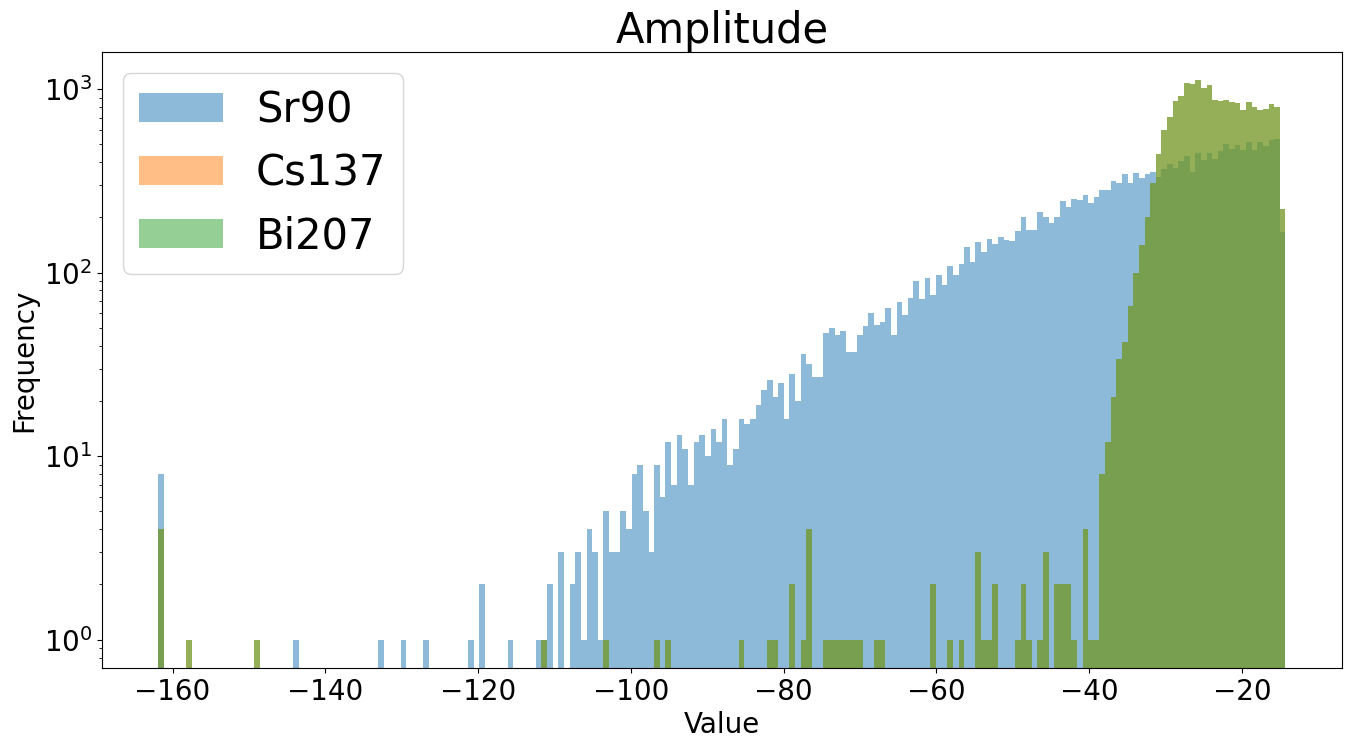

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 0])
max = np.amax(Sr90[:, 0])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 201)
ax.hist(Sr90[:, 0], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137[:, 0], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207[:, 0], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Amplitude', fontsize=30)
plt.show()

Minimum value of the array: -21.916475137406643
Maximum value of the array: -11.496608484608362


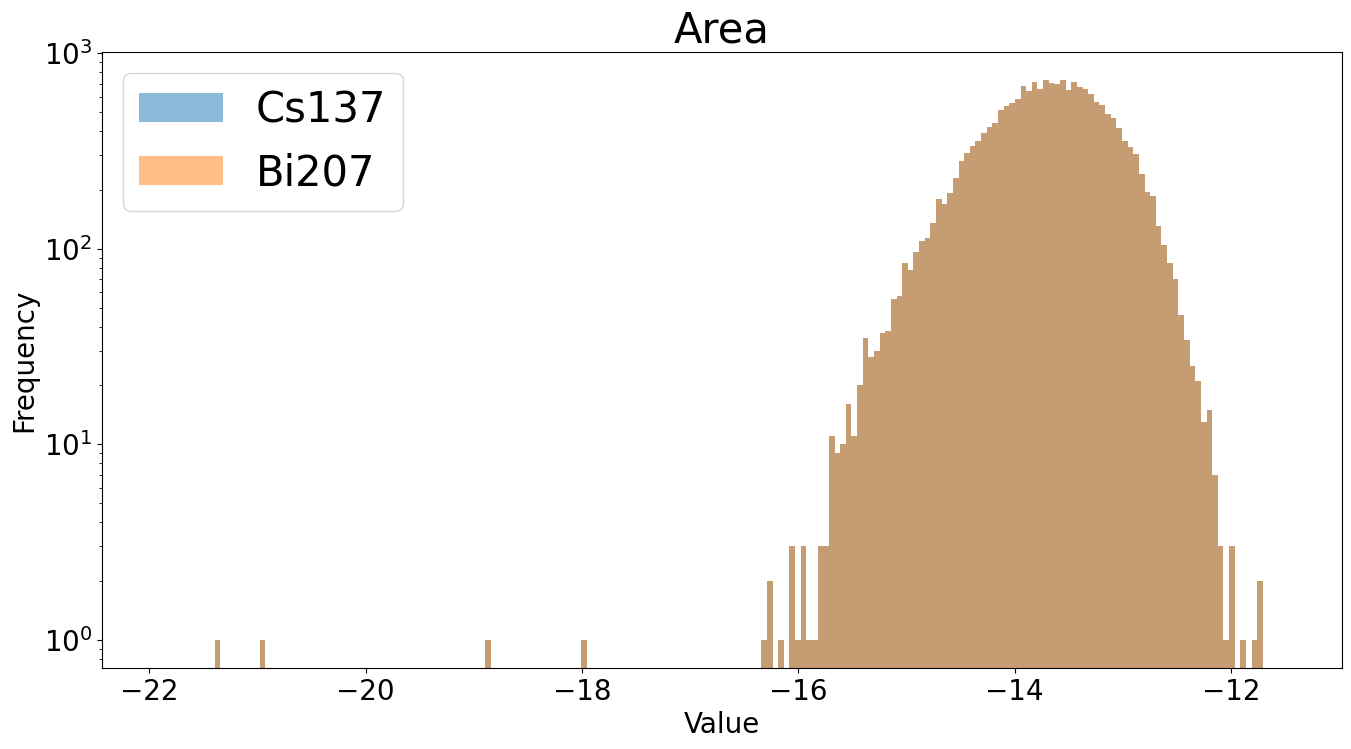

In [49]:
fig, ax = plt.subplots(figsize=(16, 8))


# Find the minimum and maximum values of the array
min = np.amin(Sr90[:, 1])
max = np.amax(Sr90[:, 1])

# Print the minimum and maximum values of the array
print('Minimum value of the array:', min)
print('Maximum value of the array:', max)


bins = np.linspace(min, max, 201)
#ax.hist(Sr90[:, 1], bins, alpha=0.5, label='Sr90')
ax.hist(Cs137[:, 1], bins, alpha=0.5, label='Cs137')
ax.hist(Bi207[:, 1], bins, alpha=0.5, label='Bi207')
#ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
ax.set_yscale('log')  # y축을 로그 스케일로 변경
ax.legend(fontsize=30)
ax.set_title('Area', fontsize=30)
plt.show()

###3. Removing Outlier Data (Background)

In [32]:
Sr90_X = Sr90
Cs137_X = Cs137
Bi207_X = Bi207

In [33]:
# print(Sr90_X[1,:])

In [10]:
# Sr90_X_mask = Sr90_X[:, 0] > 0.13
# Sr90_X = Sr90_X[~Sr90_X_mask]
# print(Sr90_X.shape)

# Cs137_X_mask = Cs137_X[:, 0] > 0.10
# Cs137_X = Cs137_X[~Cs137_X_mask]
# print(Cs137_X.shape)

# Bi207_X_mask = Bi207_X[:, 0] > 0.13
# Bi207_X = Bi207_X[~Bi207_X_mask]
# print(Bi207_X.shape)

In [11]:
# Sr90_X_mask2 = Sr90_X[:, 14] < -20
# Sr90_X = Sr90_X[~Sr90_X_mask2]
# print(Sr90_X.shape)

# Cs137_X_mask2 = Cs137_X[:, 14] < -30
# Cs137_X = Cs137_X[~Cs137_X_mask2]
# print(Cs137_X.shape)

# Bi207_X_mask2 = Bi207_X[:, 14] < -20
# Bi207_X = Bi207_X[~Bi207_X_mask2]
# print(Bi207_X.shape)

In [12]:
# Sr90_X_mask = Sr90_X[:, 15] > 1.3
# Sr90_X = Sr90_X[~Sr90_X_mask]
# print(Sr90_X.shape)

# Cs137_X_mask = Cs137_X[:, 15] > 1.3
# Cs137_X = Cs137_X[~Cs137_X_mask]
# print(Cs137_X.shape)

# Bi207_X_mask = Bi207_X[:, 15] > 1.3
# Bi207_X = Bi207_X[~Bi207_X_mask]
# print(Bi207_X.shape)

In [13]:
# Sr90_X_mask = Sr90_X[:, 17] > 15.5
# Sr90_X = Sr90_X[~Sr90_X_mask]
# print(Sr90_X.shape)

# Cs137_X_mask = Cs137_X[:, 17] > 15.5
# Cs137_X = Cs137_X[~Cs137_X_mask]
# print(Cs137_X.shape)
# print(Bi207_X.shape)

###4. Plot Again

In [14]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(16, 8))


# # Find the minimum and maximum values of the array
# min = np.amin(Sr90_X[:, 0])
# max = np.amax(Sr90_X[:, 0])

# # Print the minimum and maximum values of the array
# print('Minimum value of the array:', min)
# print('Maximum value of the array:', max)


# bins = np.linspace(min, max, 501)
# ax.hist(Sr90_X[:, 0], bins, alpha=0.5, label='Sr90')
# ax.hist(Cs137_X[:, 0], bins, alpha=0.5, label='Cs137')
# ax.hist(Bi207_X[:, 0], bins, alpha=0.5, label='Bi207')
# #ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
# ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
# ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
# ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
# ax.set_yscale('log')  # y축을 로그 스케일로 변경
# ax.legend(fontsize=30)
# ax.set_title('Amplitude', fontsize=30)
# plt.show()

In [15]:
# fig, ax = plt.subplots(figsize=(16, 8))


# # Find the minimum and maximum values of the array
# min = np.amin(Sr90_X[:, 14])
# max = np.amax(Sr90_X[:, 14])

# # Print the minimum and maximum values of the array
# print('Minimum value of the array:', min)
# print('Maximum value of the array:', max)


# bins = np.linspace(min, max, 71)
# ax.hist(Sr90_X[:, 14], bins, alpha=0.5, label='Sr90')
# ax.hist(Cs137_X[:, 14], bins, alpha=0.5, label='Cs137')
# ax.hist(Bi207_X[:, 14], bins, alpha=0.5, label='Bi207')
# #ax.hist(Am241_X_first_col, bins, alpha=0.5, label='Am241')
# ax.set_xlabel('Value', fontsize=20)  # X축 제목의 크기를 15로 설정
# ax.set_ylabel('Frequency', fontsize=20)  # Y축 제목의 크기를 15로 설정
# ax.tick_params(axis='both', labelsize=20)  # X축과 Y축의 글씨 크기를 15로 설정
# ax.set_yscale('log')  # y축을 로그 스케일로 변경
# ax.legend(fontsize=30)
# ax.set_title('Area', fontsize=30)
# plt.show()

###5. Collect a data to use

In [16]:
# Sr90_X = np.column_stack((Sr90_X[:, 0], Sr90_X[:, 5:10], Sr90_X[:, 12:]))
# Cs137_X = np.column_stack((Cs137_X[:, 0], Cs137_X[:, 5:10], Cs137_X[:, 12:]))
# Bi207_X = np.column_stack((Bi207_X[:, 0], Bi207_X[:, 5:10], Bi207_X[:, 12:]))


# print(Sr90_X.shape)
# print(Cs137_X.shape)
# print(Bi207_X.shape)

In [17]:
# Sr90_X = Sr90
# Cs137_X = Cs137
# Bi207_X = Bi207

In [34]:
print(Sr90_X.shape)
print(Cs137_X.shape)
print(Bi207_X.shape)

(20000, 22)
(20000, 22)
(20000, 22)


In [35]:
Sr90_Y = np.full(20000, 90, dtype=np.int32)
Cs137_Y = np.full(20000, 137, dtype=np.int32)
Bi207_Y = np.full(20000, 207, dtype=np.int32)

In [36]:
print(Sr90_Y.shape)
print(Cs137_Y.shape)
print(Bi207_Y.shape)

(20000,)
(20000,)
(20000,)


In [37]:
X = np.concatenate([Sr90_X, Cs137_X, Bi207_X], axis=0)
X.shape

(60000, 22)

In [38]:
y = np.concatenate([Sr90_Y, Cs137_Y, Bi207_Y], axis=0)
y.shape

(60000,)

###6. Decision Tree (Not use anymore)

In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=1000, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=1000, random_state=42)

Decision trees require very little data preparation. They don't require feature scaling or centering at all.

In [40]:
tree_clf.feature_importances_

array([0.21921421, 0.05863541, 0.02215302, 0.08461291, 0.04100866,
       0.02470373, 0.0204582 , 0.02000291, 0.01620911, 0.02126711,
       0.02586541, 0.03237634, 0.02419855, 0.04175564, 0.04372455,
       0.04535128, 0.05185305, 0.04553118, 0.03896705, 0.03709529,
       0.03641717, 0.04859922])

###7. Random Forest

# Ensemble Learning | Random Forests

* ask many people a complex question and aggregate their answers - the **wisdom of the crowds**
* aggregate the predictions of a group of predictors (classifiers or regressors) --> better predictions than the best individual predictor
* a group of predictors is called an **ensemble**; the technique is called **ensemble learning**
* e.g., you can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you obtain the predictions of all the indivisual trees, then predict the class that gets the most votes --> **Random Forest**
* the winning solutions in ML competitions often involve ensemble methods

## Voting classifiers

* we have trained a few classifiers, each one achieving about 80% accuracy
* we can create an even better classifier is to aggreagte the predictions of each classifier and predict the class that gets the most votes
* this is called a **hard voting classifier**

In [41]:
from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_moons

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Random Forests

A Random Forest is an ensemble of Decision Trees, generally trained via the bagging method, typically with `max_samples` set to the size of the training set. Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the **RandomForestClassifier** class.

In [42]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5728666666666666


In [44]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred2 = rnd_clf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred2))

0.5942


In [46]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=64, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred3 = rnd_clf.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred3))

0.6142


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=5000, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred9 = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred9))

0.7424


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=5000, max_leaf_nodes=5000, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred10 = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred10))

0.8800248492221676


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=12000, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred11 = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred11))

0.8778505422825046


###8. Result

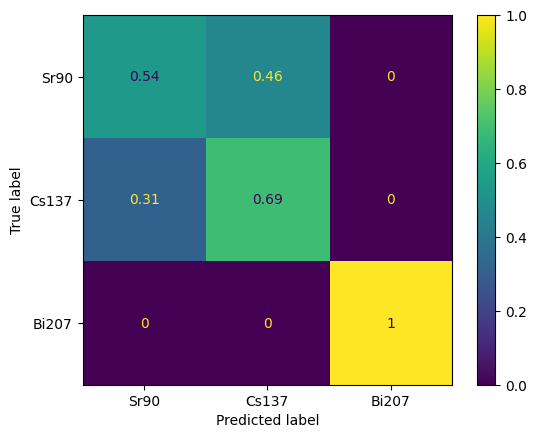

In [ ]:
#Confusion Matrix with percetage

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred3)

# Normalize the confusion matrix to show the probability values
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a ConfusionMatrixDisplay object with probability values
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sr90', 'Cs137', 'Bi207'])

# Display the confusion matrix with probability values
disp.plot()

In [ ]:
rnd_clf.feature_importances_

array([0.02127405, 0.0660067 , 0.06458768, 0.05282707, 0.04900737,
       0.06472848, 0.04699638, 0.04737761, 0.04871637, 0.055188  ,
       0.02117726, 0.02534353, 0.02678397, 0.06386104, 0.06401918,
       0.05190684, 0.0584638 , 0.05256301, 0.05889244, 0.06027923])

In [ ]:
n_features = rnd_clf.n_features_in_

In [ ]:
feature_list = ['Amp', 'Rise/FWHM', 'Fall/FWHM', 'Rise/Fall', 'Rise/(Rise+Fall)', 'Fall(Rise+Fall)', 'Rise/Area', 'Fall/Area', 'Area', 'FWHM', 'Fall80-20', 'Rise80-20', 'Rise+Fall', 'Rise-Fall', '(Rise-Fall)/Amp', '(Rise-Fall)/Area', 'Rise/Amp', 'Fall/Amp', '(Rise-Fall) ^2', '(FallxAmp)/Area', '(RisexAmp)/Area', '(Rise+Fall)xAmp/Area', '(Rise-Fall)xAmp/Area']

<Figure size 5760x4320 with 0 Axes>

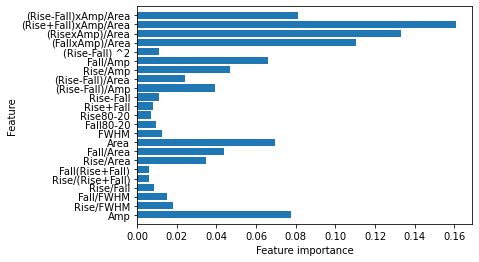

<Figure size 5760x4320 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.barh(np.arange(n_features), rnd_clf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_list)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features);
plt.figure(figsize=(80, 60))